In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data into csv file
df = pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')

# Exploratory Data Analysis and Data Cleaning

In [41]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [42]:
df.shape

(119390, 32)

In [43]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [45]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [46]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print(len(df[col].unique()))
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
2
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
12
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
5
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' '

In [47]:
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [48]:
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 19, 26, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [49]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [50]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [51]:
df['company'].notnull()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: company, Length: 119390, dtype: bool

In [52]:
df.drop('company',axis = 1, inplace = True)

In [53]:
df = df.dropna(axis=0)

In [54]:
df.shape

(102894, 31)

In [55]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [56]:
df.shape

(102894, 31)

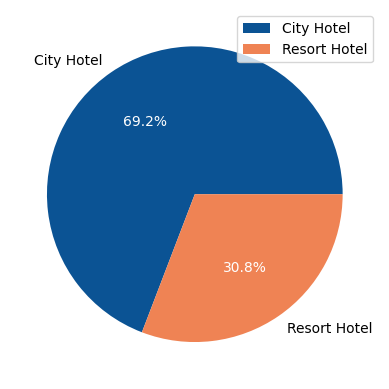

In [57]:
temp = df.groupby('hotel').size()
_, _, autotexts = plt.pie(temp.values, labels=temp.index, autopct='%1.1f%%', colors=['#0b5394','#EF8354'])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend()
plt.show()

Text(0.5, 0, 'Arrival date year')

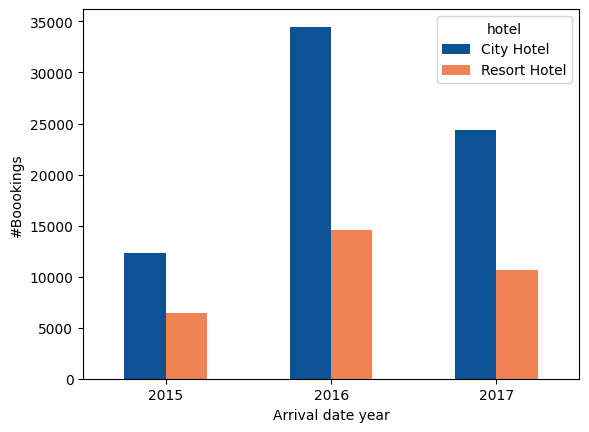

In [58]:
temp = df.groupby(['arrival_date_year','hotel']).size()
temp = temp.unstack(level=1)
ax = temp.plot.bar(rot=0, color=['#0b5394','#EF8354'])
ax.set_ylabel("#Boookings")
ax.set_xlabel("Arrival date year")

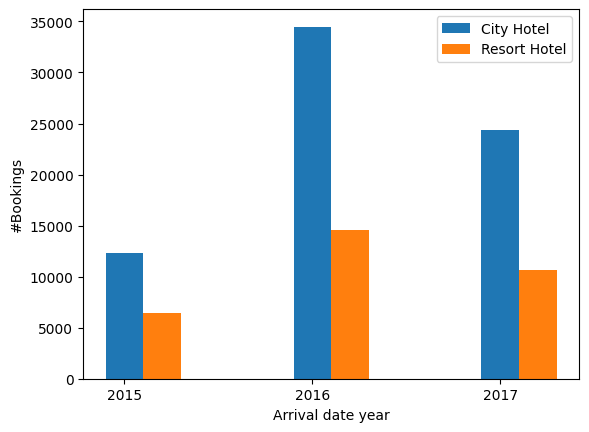

In [59]:
temp = df.groupby(['arrival_date_year','hotel']).size()

bar_city = list(temp.values[[0,2,4]])
bar_resort = list(temp.values[[1,3,5]])

years = np.array([2015,2016,2017])
width = 0.2

plt.bar(years, bar_city, width)
plt.bar(years+0.2, bar_resort, width)
plt.xticks(years)
plt.legend(['City Hotel','Resort Hotel'])
plt.xlabel("Arrival date year")
plt.ylabel("#Bookings")
plt.show()

Text(0, 0.5, '#Bookings')

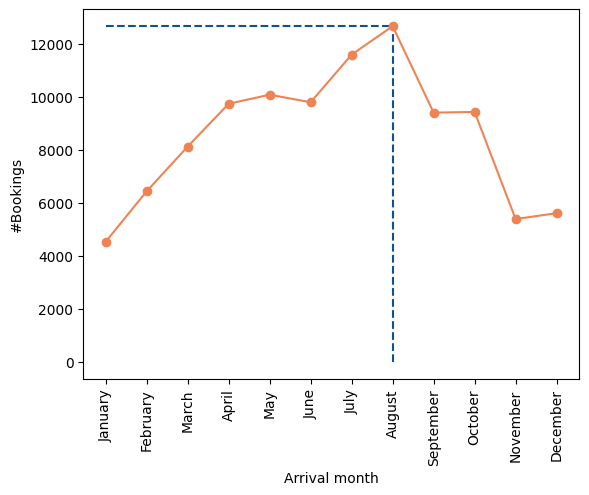

In [60]:
# Booking by month (for all years)
temp = df.groupby('arrival_date_month').size()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp = temp.reindex(new_order, axis=0)

plt.xticks(rotation=90)
plt.vlines(new_order, 0, [0,0,0,0,0,0,0,temp.max(),0,0,0,0], linestyle="dashed", color="#0b5394")
# plt.hlines(y, 0, x, linestyle="dashed")
plt.hlines([None,None,None,None,None,None,None,temp.max(),None,None,None,None],0,new_order ,linestyle="dashed", color="#0b5394")
plt.plot(temp.index, temp.values, color='#EF8354',marker='o')
plt.xlabel("Arrival month")
plt.ylabel("#Bookings")

In [61]:
temp.max()

12672

In [62]:
# Booking by month (for each years)
temp = df.groupby(['arrival_date_year','arrival_date_month']).size()
temp

arrival_date_year  arrival_date_month
2015               August                3351
                   December              2364
                   July                  2566
                   November              1852
                   October               4164
                   September             4546
2016               April                 4850
                   August                4688
                   December              3256
                   February              3047
                   January               1775
                   July                  4169
                   June                  4860
                   March                 4034
                   May                   4695
                   November              3544
                   October               5273
                   September             4865
2017               April                 4896
                   August                4633
                   February              3

arrival_date_year     2015    2016    2017
arrival_date_month                        
January                NaN  1775.0  2771.0
February               NaN  3047.0  3398.0
March                  NaN  4034.0  4098.0
April                  NaN  4850.0  4896.0
May                    NaN  4695.0  5392.0
June                   NaN  4860.0  4943.0
July                2566.0  4169.0  4864.0
August              3351.0  4688.0  4633.0
September           4546.0  4865.0     NaN
October             4164.0  5273.0     NaN
November            1852.0  3544.0     NaN
December            2364.0  3256.0     NaN


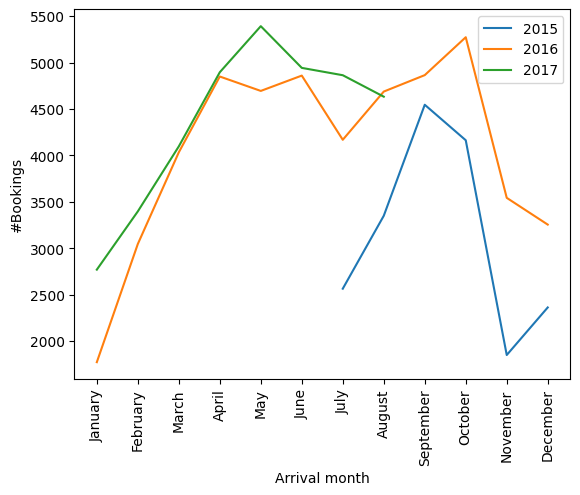

In [63]:
# Booking by month (for each years)
temp = df.groupby(['arrival_date_month','arrival_date_year']).size()
temp = temp.unstack(level=1)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
temp = temp.reindex(new_order, axis=0)
plt.xticks(rotation=90)

print(temp)
    
plt.plot(temp,label=['2015','2016','2017'])
plt.legend()
plt.xlabel("Arrival month")
plt.ylabel("#Bookings")
plt.show()

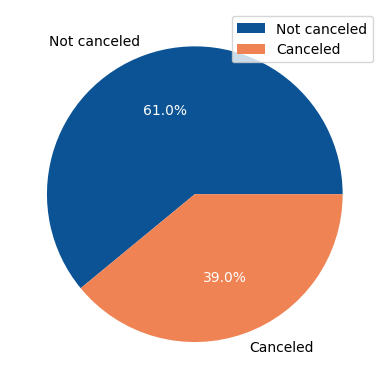

In [64]:
temp = df.groupby('is_canceled').size()
_, _, autotexts = plt.pie(temp.values, labels=["Not canceled","Canceled"], autopct='%1.1f%%', colors=['#0b5394','#EF8354'])
for autotext in autotexts:
    autotext.set_color('white')

plt.legend()
plt.show()

Text(0.5, 0, 'Hotel')

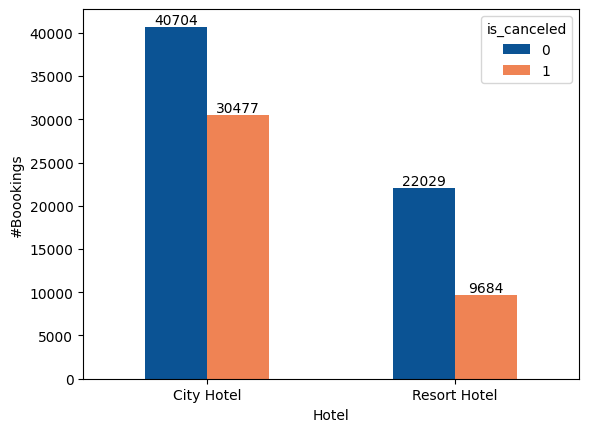

In [65]:
temp = df.groupby(['hotel','is_canceled']).size()
temp = temp.unstack(level=1)
ax = temp.plot.bar(rot=0, color=['#0b5394','#EF8354'])
for container in ax.containers:
    ax.bar_label(container)
ax.set_ylabel("#Boookings")
ax.set_xlabel("Hotel")

In [66]:
df['booking_changes'].unique()

array([ 0,  1,  2,  3,  5,  4, 17,  6,  8,  7, 10, 16,  9, 13, 12, 14, 15,
       18, 11])

In [67]:
temp = df.groupby(['booking_changes','is_canceled']).size()
temp = temp.unstack(level=1)

temp

is_canceled,0,1
booking_changes,,
0,51026.0,37619.0
1,8444.0,1576.0
2,2317.0,720.0
3,557.0,139.0
4,225.0,61.0
5,66.0,17.0
6,36.0,18.0
7,23.0,3.0
8,10.0,4.0


In [68]:
temp = df.groupby(['booking_changes','is_canceled']).size()
temp = temp.unstack(level=1)

temp = temp[temp.index.isin(range(0,19))]
temp = temp.unstack(level=1)
temp = temp.unstack(level=1)
s = temp.values[0]+temp.values[1]
s

array([8.8645e+04, 1.0020e+04, 3.0370e+03, 6.9600e+02, 2.8600e+02,
       8.3000e+01, 5.4000e+01, 2.6000e+01, 1.4000e+01, 8.0000e+00,
       6.0000e+00,        nan,        nan,        nan, 3.0000e+00,
              nan, 2.0000e+00,        nan,        nan])

Text(0.5, 0, '#Booking changes')

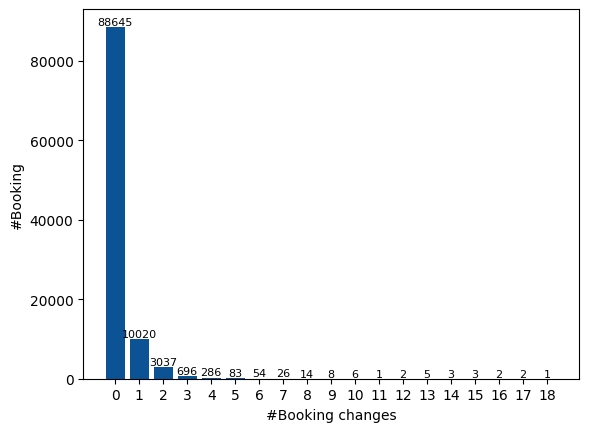

In [69]:
temp = df.groupby(['booking_changes']).size()

fig, ax = plt.subplots()
bars = ax.bar(range(0,19),temp.values, color ='#0b5394')
plt.xticks(range(0,19))

ax.bar_label(bars,fontsize=8)
ax.set_ylabel("#Booking")
ax.set_xlabel("#Booking changes")

Text(0.5, 0, '#Booking changes')

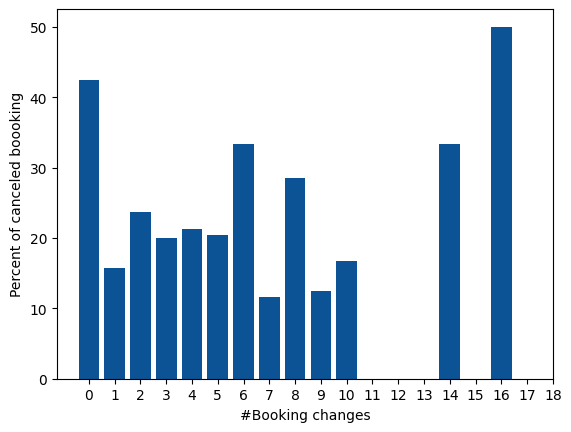

In [70]:
temp = df.groupby(['booking_changes','is_canceled']).size()
temp = temp.unstack(level=1)

temp = temp[temp.index.isin(range(0,19))]
temp = temp.unstack(level=1)
temp = temp.unstack(level=1)
temp = temp[temp.index.isin([1])]

val = temp.values[0]/s*100
fig, ax = plt.subplots()
bars = ax.bar(range(0,19),val, color ='#0b5394')
plt.xticks(range(0,19))

ax.set_ylabel("Percent of canceled boooking")
ax.set_xlabel("#Booking changes")

Text(0.5, 0, '#Booking changes')

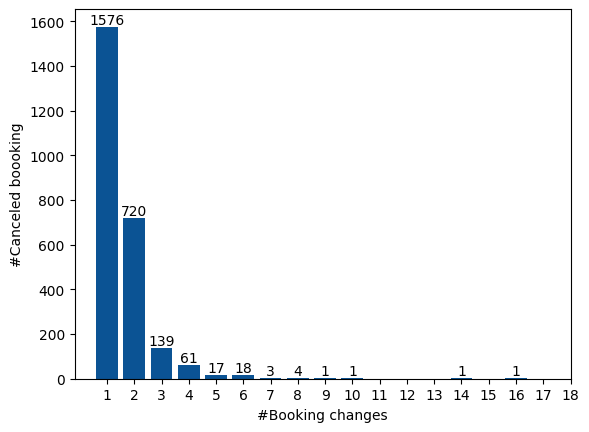

In [71]:
temp = df.groupby(['booking_changes','is_canceled']).size()
temp = temp.unstack(level=1)

temp = temp[temp.index.isin(range(1,19))]
temp = temp.unstack(level=1)
temp = temp.unstack(level=1)
temp = temp[temp.index.isin([1])]

val = temp.values[0]
fig, ax = plt.subplots()
bars = ax.bar(range(1,19),val, color ='#0b5394')
plt.xticks(range(1,19))

ax.bar_label(bars)
ax.set_ylabel("#Canceled boooking")
ax.set_xlabel("#Booking changes")

Text(0.5, 0, '#Booking changes')

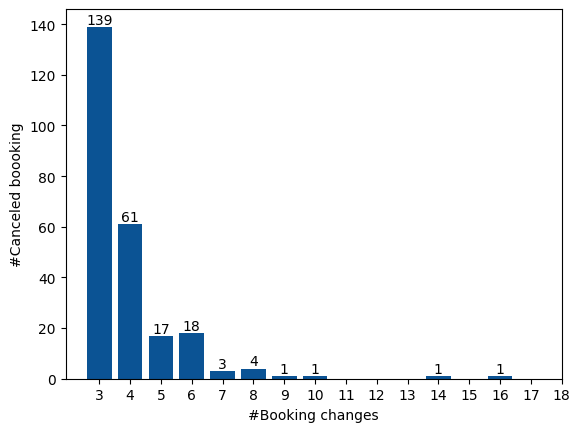

In [72]:
temp = df.groupby(['booking_changes','is_canceled']).size()
temp = temp.unstack(level=1)

temp = temp[temp.index.isin(range(3,19))]
temp = temp.unstack(level=1)
temp = temp.unstack(level=1)
temp = temp[temp.index.isin([1])]

val = temp.values[0]

fig, ax = plt.subplots()
bars = ax.bar(range(3,19),val, color ='#0b5394')
plt.xticks(range(3,19))

ax.bar_label(bars)
ax.set_ylabel("#Canceled boooking")
ax.set_xlabel("#Booking changes")

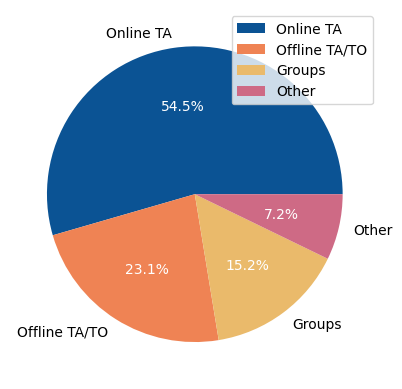

In [73]:
temp = df.groupby('market_segment').size()
temp = temp.sort_values(ascending=False)
top = temp[:3].copy()

new_row = pd.Series(
    temp[3:].sum(),
    index=["Other"])


top = pd.concat([top, new_row])
top

# top
_, _, autotexts = plt.pie(top.values, labels=top.index, autopct='%1.1f%%', colors=['#0b5394','#EF8354','#EABA6B','#CE6A85'])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend()
plt.show()

In [74]:
non = df[df['is_canceled'] == False]['lead_time']
can = df[(df['is_canceled'] == True)]['lead_time']

[Text(1, 0, 'Canceled'), Text(2, 0, 'Not canceled')]

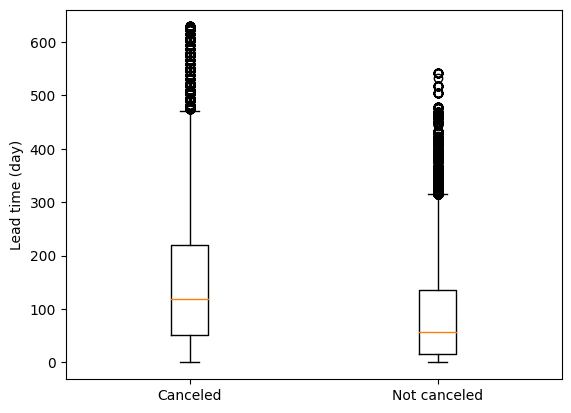

In [75]:
d = {'Canceled': can.values, 'Not canceled': non.values}

fig, ax = plt.subplots()
ax.boxplot(d.values())
ax.set_ylabel("Lead time (day)")
ax.set_xticklabels(d.keys())

In [76]:
len(df.loc[(df['arrival_date_month'] == 'April')  & (df['hotel'] == 'Resort Hotel' )])

2886

In [77]:
len(df.loc[(df['arrival_date_month'] == 'April')  & (df['hotel'] != 'Resort Hotel' )])

6860